# Plots y visualización de datos

In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math

In [3]:
mainpath= "C:/Users/jvill/Documents/ESCUELA/Machine Learning"
path="Datasets/customer-churn-model/Customer Churn Model.txt"
direccion =os.path.join(mainpath,path)

In [4]:
datos = pd.read_csv(direccion)
datos.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
datos.shape

(3333, 21)

## Scattter plot   -   plot(kind="scatter")

El scatter plot se hace con un plot general en el que se indica de parámetro que se desea que sea scatter

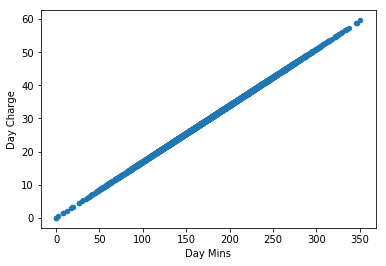

In [8]:
# Estas variables se antojan para revisar si están relacionadas proporcionalmente
datos.plot(kind="scatter",x="Day Mins",y="Day Charge") 

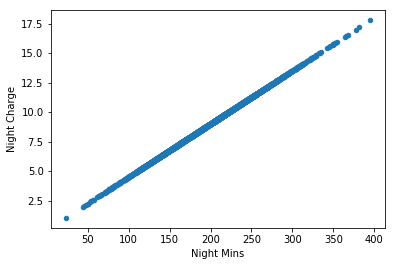

In [9]:
#Tambien, por el significado de estas variables, suponemos que estan relacionadas directamente proporcional
datos.plot(kind="scatter",x="Night Mins",y="Night Charge")

## Panel de gráficas   -    matplotlib.pyplot.subplots()

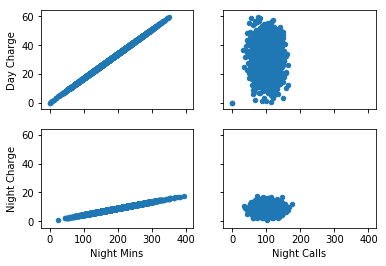

In [10]:
#Hacer panel de 2x2. Cada gráfica con la misma escala en sus ejes x e y.
figure, cuadros = plt.subplots(2,2,sharex=True,sharey=True) 
datos.plot(kind="scatter",x="Day Mins",y="Day Charge",ax=cuadros[0][0])       #Se añade plot en la posicion (0,0) del panel
datos.plot(kind="scatter",x="Day Calls",y="Day Charge",ax=cuadros[0][1])
datos.plot(kind="scatter",x="Night Mins",y="Night Charge",ax=cuadros[1][0])
datos.plot(kind="scatter",x="Night Calls",y="Night Charge",ax=cuadros[1][1])

## Histograma de frecuencias  -   matplotlib.pyplot.hist()

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

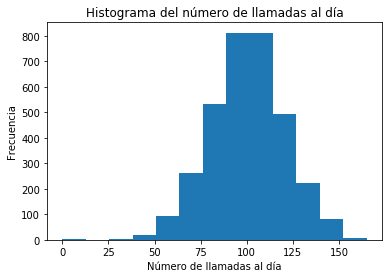

In [16]:
sturges=round(1+(math.log(3333,2)))  # Mediante regla de sturges se obtiene el número óptimo de clases para el histograma
plt.hist(datos["Day Calls"],bins=sturges)  #Mediante la librería matplotlib.pyplot se genera el histograma
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

## Boxplot - matplotlib.pyplot.boxplot()

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

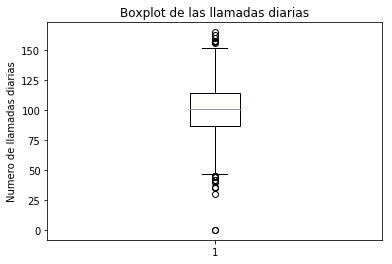

In [19]:
plt.boxplot(datos["Day Calls"])   # El boxplot recibe como parámetro un arreglo de datos, en este caso una columna del dataframe
plt.ylabel("Numero de llamadas diarias")  #Se pone el nombre de la variable que representa tal columna
plt.title("Boxplot de las llamadas diarias") #Se pone el título al gráfico

In [22]:
datos["Day Calls"].describe()  #Devuelve los principales estadisticos de la columna Day Calls

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [23]:
#Así se obtiene el rango intercuantilico: cuartil 75% - cuartil 25%
IQR = datos["Day Calls"].quantile(0.75)-datos["Day Calls"].quantile(0.25)
IQR

27.0

In [26]:
# Los límites de los bigotes se encuentran a 1.5IQR de los cuartiles %75 (hacia arriba) y %25 (hacia abajo)
print(datos["Day Calls"].quantile(0.25)-1.5*IQR, "bigote inferior")
print(datos["Day Calls"].quantile(0.75)+1.5*IQR, "bigote superior")

#Los individuos que están más allá de los bigotes, representados por circulos o puntos, son outlayers

46.5 bigote inferior
154.5 bigote superior
